In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = 'untidy_combined_toronto_property_data.csv'
df = pd.read_csv(file_path)
print(df.head(10))

       price    region                                     address bedrooms   
0    799,000  Ajax, ON                   2 ROLLO DR, Ajax, Ontario        3  \
1    989,000  Ajax, ON          717 OLD HARWOOD AVE, Ajax, Ontario    2 + 1   
2    999,900  Ajax, ON               52 ADDLEY CRES, Ajax, Ontario        3   
3    799,900  Ajax, ON              249 MONARCH AVE, Ajax, Ontario        3   
4    899,999  Ajax, ON                 18 MONK CRES, Ajax, Ontario        3   
5  1,199,000  Ajax, ON                  4 SALLIS DR, Ajax, Ontario        4   
6  2,600,000  Ajax, ON                 45 BLOWER RD, Ajax, Ontario      NaN   
7    899,000  Ajax, ON          38 E COXHEAD Lane, Durham, Ontario    3 + 0   
8  1,449,000  Ajax, ON                   4 BIGGS DR, Ajax, Ontario    4 + 1   
9    549,900  Ajax, ON  #415 -191 LAKE DRIVEWAY WAY, Ajax, Ontario        2   

   bathrooms  
0        3.0  
1        1.0  
2        4.0  
3        3.0  
4        3.0  
5        3.0  
6        NaN  
7        0

In [4]:
# Remove commas from the 'price' column
df['price'] = df['price'].str.replace(',', '', regex=False)

# Convert the 'price' column to float
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [5]:
print(df['price'].head(10))  # View the first 10 entries

0     799000.0
1     989000.0
2     999900.0
3     799900.0
4     899999.0
5    1199000.0
6    2600000.0
7     899000.0
8    1449000.0
9     549900.0
Name: price, dtype: float64


In [6]:
# Basic summary of data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7756 entries, 0 to 7755
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      7733 non-null   float64
 1   region     7756 non-null   object 
 2   address    7751 non-null   object 
 3   bedrooms   7531 non-null   object 
 4   bathrooms  7365 non-null   float64
dtypes: float64(2), object(3)
memory usage: 303.1+ KB
None
              price    bathrooms
count  7.733000e+03  7365.000000
mean   1.548050e+06     2.965377
std    1.925329e+06     1.406616
min    1.000000e-02     0.000000
25%    7.990000e+05     2.000000
50%    1.099000e+06     3.000000
75%    1.680000e+06     4.000000
max    5.500000e+07    15.000000


In [7]:
# Remove '+' and everything after it in the 'bedrooms' column
df['bedrooms'] = df['bedrooms'].str.split('+').str[0]

In [8]:
# Convert the 'bedrooms' column back to numeric type
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')

In [9]:
print(df.dtypes)

price        float64
region        object
address       object
bedrooms     float64
bathrooms    float64
dtype: object


In [10]:
##Identify missing or inconsistent values:

print(df.isnull().sum())

price         23
region         0
address        5
bedrooms     225
bathrooms    391
dtype: int64


In [11]:
## Handle Missing Data:
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())

In [12]:
print(df['bedrooms'].head(20))

0     3.0
1     2.0
2     3.0
3     3.0
4     3.0
5     4.0
6     3.0
7     3.0
8     4.0
9     2.0
10    3.0
11    3.0
12    2.0
13    3.0
14    3.0
15    3.0
16    3.0
17    3.0
18    3.0
19    3.0
Name: bedrooms, dtype: float64


In [13]:
# Fill null values in 'price' with the average price of its region
df['price'] = df['price'].fillna(df.groupby('region')['price'].transform('mean'))

In [14]:
# check if there are any remaining NaN values in the price column:
print(df['price'].isnull().sum())

0


C:\Users\nyous\AppData\Local\Temp\ipykernel_12800\3867461327.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='price', data=df, estimator=np.mean, ci=None, palette='viridis')


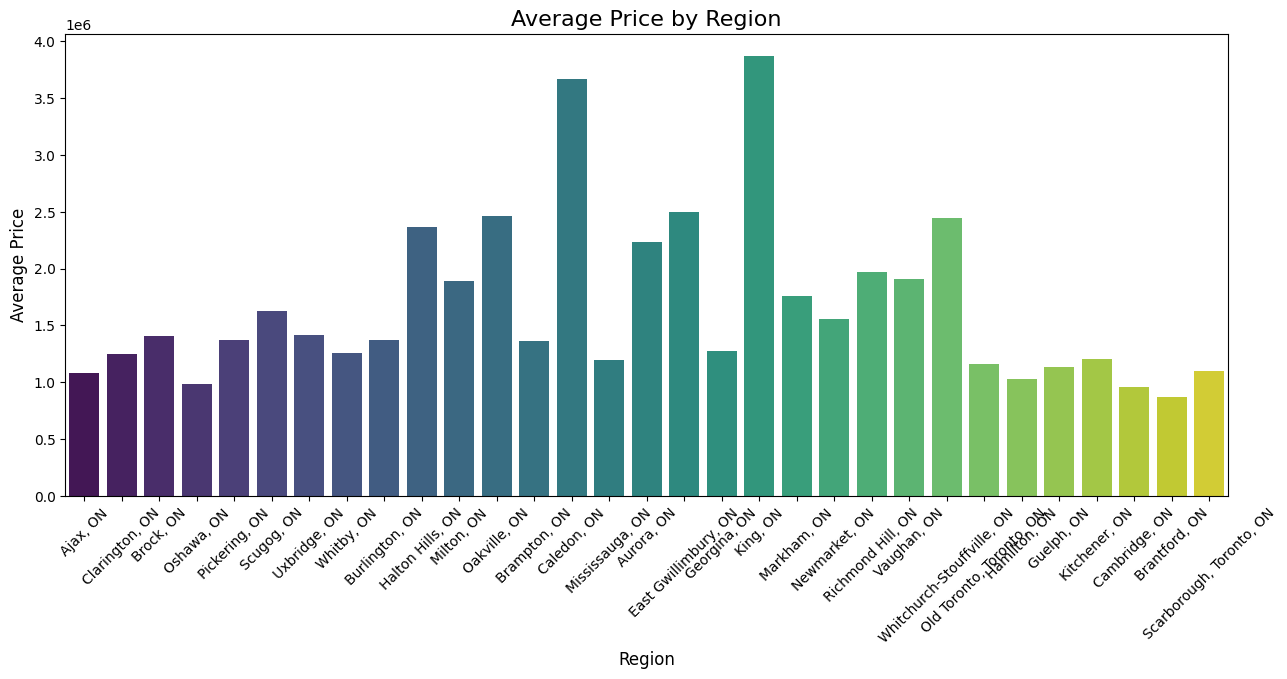

In [16]:
#Average Price by Region

#To see how prices vary across regions:

plt.figure(figsize=(15, 6))
sns.barplot(x='region', y='price', data=df, estimator=np.mean, ci=None, palette='viridis')
plt.title('Average Price by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45)
plt.show()

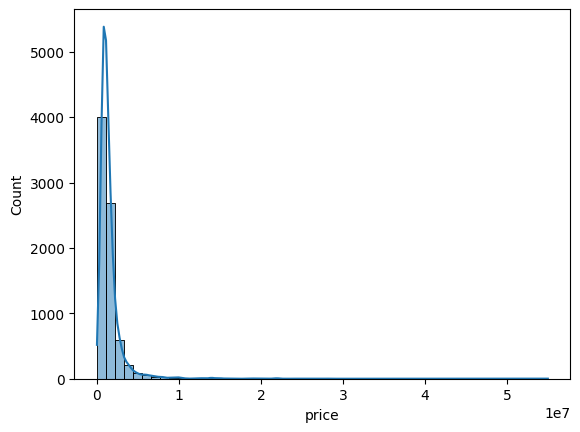

In [17]:
## Analyze price distribution:

sns.histplot(df['price'], bins=50, kde=True)
plt.show()

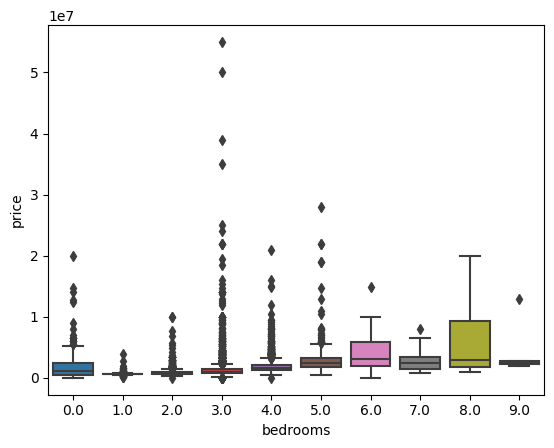

In [18]:
## Analyze bedroom and bathroom count:

sns.boxplot(x='bedrooms', y='price', data=df)
plt.show()

In [19]:
##Group by region:

region_summary = df.groupby('region')['price'].mean().sort_values(ascending=False)
print(region_summary)

region
King, ON                      3.869057e+06
Caledon, ON                   3.666438e+06
East Gwillimbury, ON          2.493229e+06
Oakville, ON                  2.463550e+06
Whitchurch-Stouffville, ON    2.448015e+06
Halton Hills, ON              2.363031e+06
Aurora, ON                    2.235782e+06
Richmond Hill, ON             1.965860e+06
Vaughan, ON                   1.908730e+06
Milton, ON                    1.891485e+06
Markham, ON                   1.756014e+06
Scugog, ON                    1.626224e+06
Newmarket, ON                 1.553301e+06
Uxbridge, ON                  1.416479e+06
Brock, ON                     1.402364e+06
Pickering, ON                 1.373662e+06
Burlington, ON                1.367469e+06
Brampton, ON                  1.359660e+06
Georgina, ON                  1.273619e+06
Whitby, ON                    1.258924e+06
Clarington, ON                1.252251e+06
Kitchener, ON                 1.202906e+06
Mississauga, ON               1.194470e+06
Old 

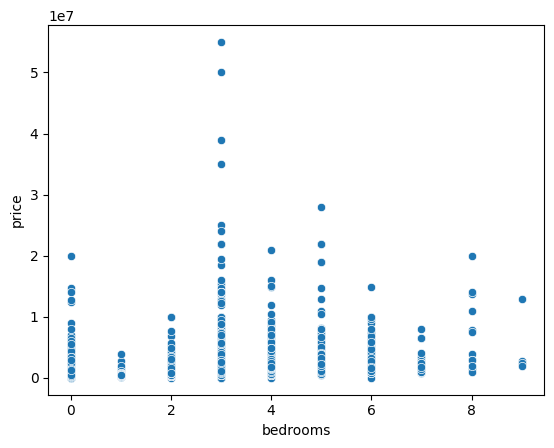

In [20]:
#scatter plot for price vs. bedrooms:

sns.scatterplot(x='bedrooms', y='price', data=df)
plt.show()

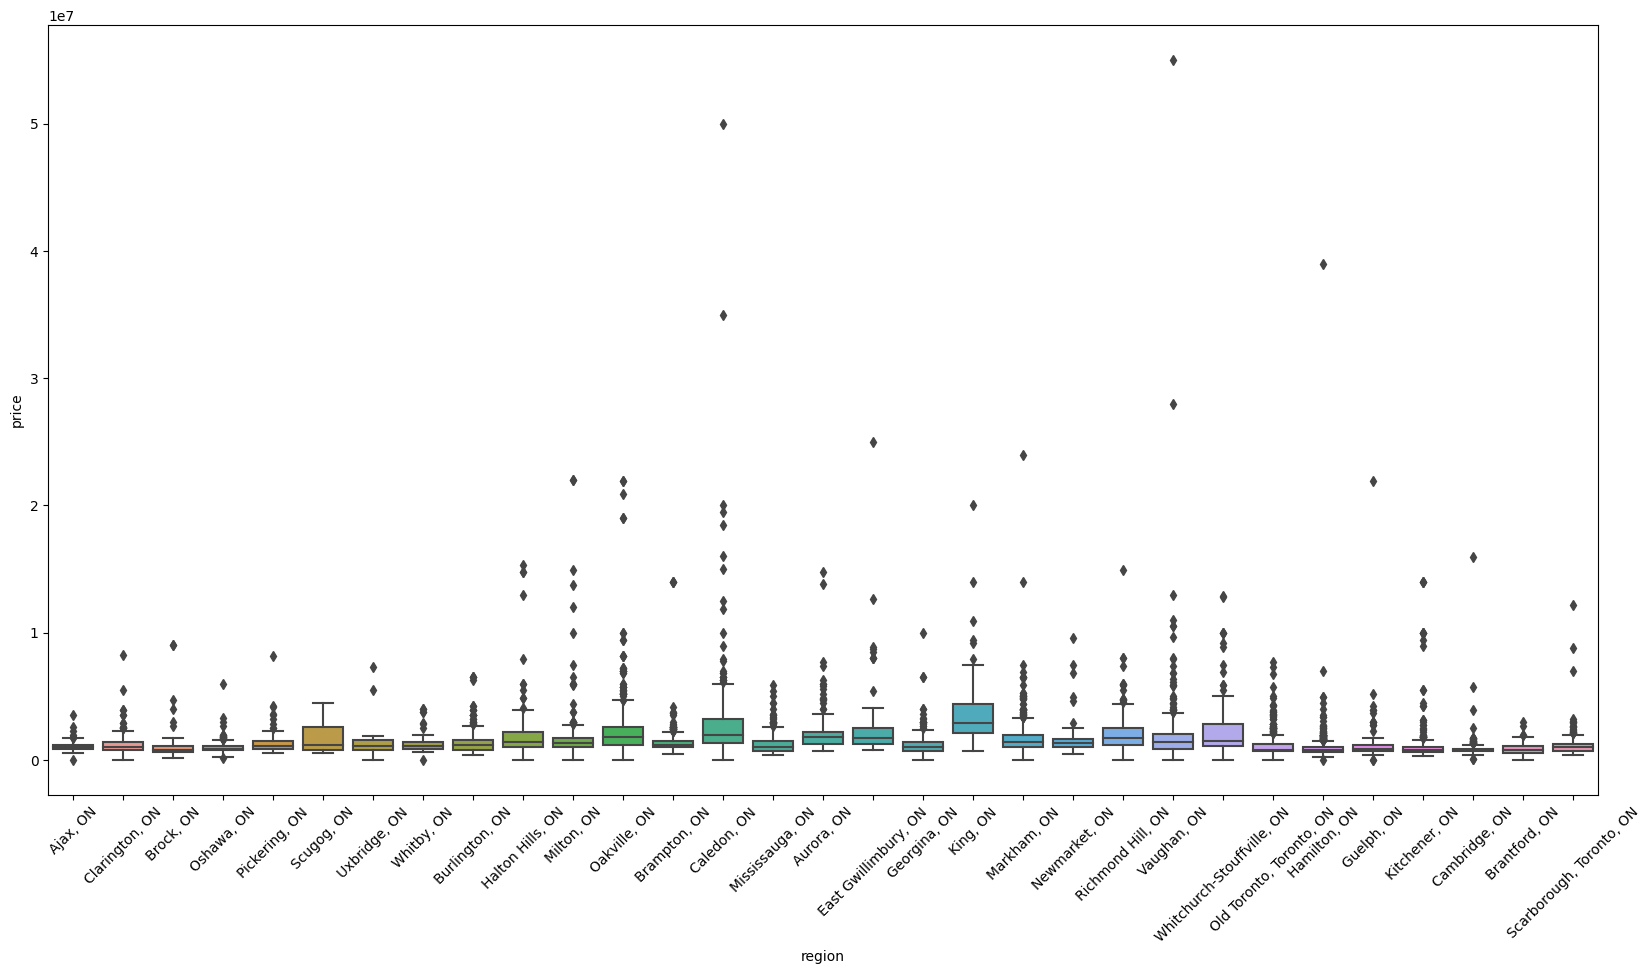

In [21]:
#price distribution by region:
plt.figure(figsize=(20,10))
sns.boxplot(x='region', y='price', data=df)
plt.xticks(rotation=45)
plt.show()

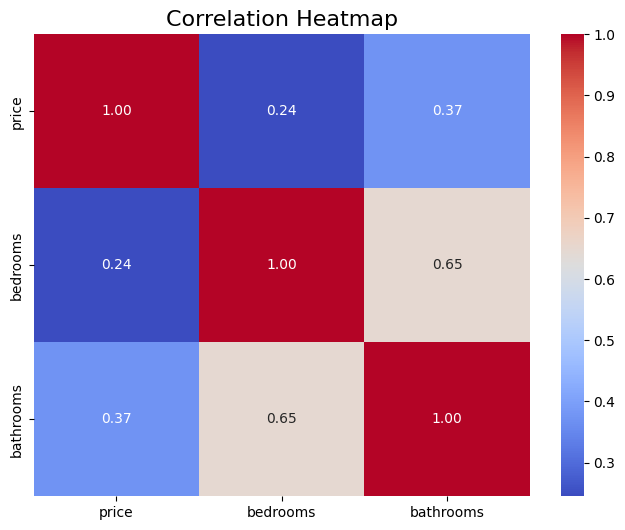

In [22]:
 #Correlation Heatmap(To explore correlations between numerical columns (e.g., price, bedrooms, bathrooms)):

plt.figure(figsize=(8, 6))
corr = df[['price', 'bedrooms', 'bathrooms']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()